# ```aggregate```: Simple Examples

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='white')
sns.set_palette("husl", 4, .75)
sns.set_style("ticks")


In [2]:
import aggregate as agg

In [3]:
uw = agg.Underwriter()

In [4]:
uw.list()

,Curves,Blocks,Books
0,fixed,scs,bodoff1
1,directors_a,casxol,bodoff2
2,directors_b,cata,bodoff3
3,directors_c,catb,bodoff4
4,cata,catc,Three Line Example
5,catb,catd,Single
6,catc,cate,Mixed
7,catd,noncata,Sublines
8,cate,noncatb,small_medium_large
9,noncata,comm_auto,mass_test


In [8]:
uw.describe()

,Type,Severity,EN,ELoss,Notes
Name,,,,,
fixed,curves,dhistogram,0.000000e+00,0,a fixed loss of 1
directors_a,curves,lognorm,0.000000e+00,0,
directors_b,curves,lognorm,0.000000e+00,0,
directors_c,curves,lognorm,0.000000e+00,0,
cata,blocks,pareto,1.700000e+00,0,can put notes here to describe provenance of curve
catb,blocks,pareto,1.400000e+00,0,
catc,blocks,pareto,1.300000e+00,0,
catd,blocks,pareto,1.100000e+00,0,
cate,blocks,pareto,7.000000e-01,0,


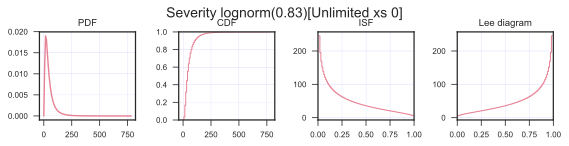

In [9]:
(0.001*uw['noncata']).write().plot()

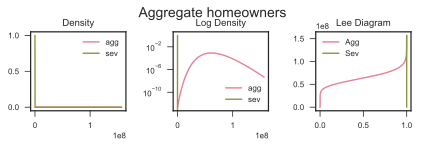

In [10]:
biz = uw.homeowners.write()
biz.update(np.linspace(0, 250e6, 1<<13), approximation='slognorm');
biz.plot('quick')

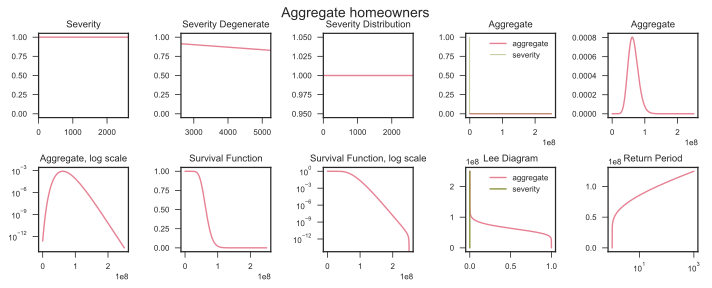

In [11]:
biz.plot('long')

In [12]:
biz.report('all')

homeowners                                                      \
measure          P99.9e        cv           ex1           ex2           ex3   
component                                                                     
agg        1.248702e+08  0.240001  6.506019e+07  4.476641e+15  3.248034e+23   
freq                NaN  0.240000  4.337346e+06  1.989618e+13  9.623804e+19   
sev                 NaN  0.500000  1.500000e+01  2.812500e+02  6.591797e+03   

                                        
measure     limit          mean   skew  
component                               
agg        2500.0  6.506019e+07  0.480  
freq          NaN  4.337346e+06  0.480  
sev           NaN  1.500000e+01  1.625

,name,limit,attachment,el,freq_1,sev_1,agg_1,agg_m,agg_cv,agg_skew
0,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,6.50602e+07,0.240001,0.48
mixed,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,6.50602e+07,0.240001,0.48


,name,limit,attachment,sevcv_param,el,prem,lr,freq_1,freq_2,freq_3,freq_m,freq_cv,freq_skew,sev_1,sev_2,sev_3,sev_m,sev_cv,sev_skew,agg_1,agg_2,agg_3,agg_m,agg_cv,agg_skew,contagion,mix_cv,wt
0,homeowners,2500,0,0.5,6.50602e+07,0,0,4.33735e+06,1.98962e+13,9.6238e+19,4.33735e+06,0.24,0.48,15,281.25,6591.8,15,0.5,1.625,6.50602e+07,4.47664e+15,3.24803e+23,6.50602e+07,0.240001,0.48,0.24,0.24,1


In [1]:
from importlib import reload
import aggregate.underwriter as trash 

In [15]:
reload(trash)
uw = trash.Underwriter()
# uw.list()

In [16]:
port = uw['bodoff1'].write(update=True)

C:\S\TELOS\Python\aggregate\port.py:1070: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
C:\S\TELOS\Python\aggregate\port.py:1074: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_not_' + col])) / \
C:\Users\steve\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:635: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


In [19]:
port.density_df.exa_wind

0.0      0.000000
1.0      0.194975
2.0      0.389950
3.0      0.584925
4.0      0.779899
5.0      0.974874
6.0      1.169849
7.0      1.364824
8.0      1.559799
9.0      1.754774
10.0     1.949749
11.0     2.144724
12.0     2.339698
13.0     2.534673
14.0     2.729648
15.0     2.924623
16.0     3.119598
17.0     3.314573
18.0     3.509548
19.0     3.704523
20.0     3.899497
21.0     4.094472
22.0     4.289447
23.0     4.484422
24.0     4.679397
25.0     4.874372
26.0     5.069347
27.0     5.264322
28.0     5.459296
29.0     5.654271
           ...   
226.0         NaN
227.0         NaN
228.0         NaN
229.0         NaN
230.0         NaN
231.0         NaN
232.0         NaN
233.0         NaN
234.0         NaN
235.0         NaN
236.0         NaN
237.0         NaN
238.0         NaN
239.0         NaN
240.0         NaN
241.0         NaN
242.0         NaN
243.0         NaN
244.0         NaN
245.0         NaN
246.0         NaN
247.0         NaN
248.0         NaN
249.0         NaN
250.0     

In [14]:
port.report('all')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
quake,0,0,nan,nan,nan,nan,0
total,nan,19.8,nan,nan,2,nan,99
wind,19.8,19.8,2.53931e-10,2,2,-1.58706e-10,99


,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
quake,0,nan,nan,inf,0,1,0,nan,nan,0,0,0,0,0,0,0,0,0,0,nan,nan,nan
total,nan,nan,nan,inf,0,1,19.8,2,1.5,19.8,1960.2,194060,99,99,99,99,99,99,99,nan,nan,nan
wind,19.8,2,1.5,inf,237.966,1,19.8,2,1.5,19.8,1960.2,194060,99,99,99,99,99,99,99,2.53931e-10,-1.58706e-10,-2.64511e-10


,not quake,not wind,quake,total,wind,not quake,not wind,quake,wind,quake,wind
,0,0,0,0,0,1,1,1,1,2,2
0.001,98.901,nan,nan,98.901,98.901,nan,nan,nan,nan,nan,98.901
0.002,98.802,nan,nan,98.802,98.802,nan,nan,nan,nan,nan,98.802
0.003,98.703,nan,nan,98.703,98.703,nan,nan,nan,nan,nan,98.703
0.004,98.604,nan,nan,98.604,98.604,nan,nan,nan,nan,nan,98.604
0.005,98.505,nan,nan,98.505,98.505,nan,nan,nan,nan,nan,98.505
0.006,98.406,nan,nan,98.406,98.406,nan,nan,nan,nan,nan,98.406
0.007,98.307,nan,nan,98.307,98.307,nan,nan,nan,nan,nan,98.307
0.008,98.208,nan,nan,98.208,98.208,nan,nan,nan,nan,nan,98.208
0.009,98.109,nan,nan,98.109,98.109,nan,nan,nan,nan,nan,98.109


In [74]:
523 >> 1

261

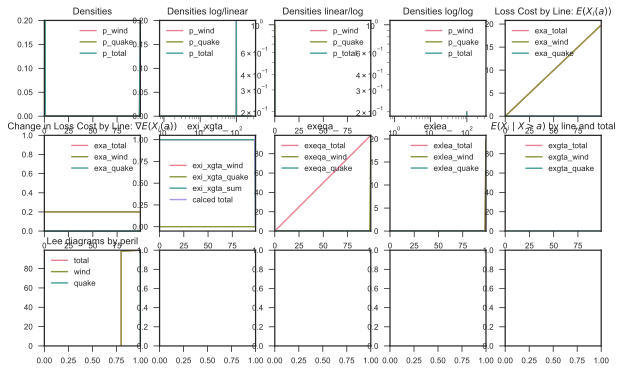

In [18]:
port.plot(kind='audit')

In [19]:
port.report('all')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
quake,0,0,nan,nan,nan,nan,0
total,nan,19.8,nan,nan,2,nan,99
wind,19.8,19.8,2.53931e-10,2,2,-1.58706e-10,99


,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
quake,0,nan,nan,inf,0,1,0,nan,nan,0,0,0,0,0,0,0,0,0,0,nan,nan,nan
total,nan,nan,nan,inf,0,1,19.8,2,1.5,19.8,1960.2,194060,99,99,99,99,99,99,99,nan,nan,nan
wind,19.8,2,1.5,inf,237.966,1,19.8,2,1.5,19.8,1960.2,194060,99,99,99,99,99,99,99,2.53931e-10,-1.58706e-10,-2.64511e-10


,not quake,not wind,quake,total,wind,not quake,not wind,quake,wind,quake,wind
,0,0,0,0,0,1,1,1,1,2,2
0.001,98.901,nan,nan,98.901,98.901,nan,nan,nan,nan,nan,98.901
0.002,98.802,nan,nan,98.802,98.802,nan,nan,nan,nan,nan,98.802
0.003,98.703,nan,nan,98.703,98.703,nan,nan,nan,nan,nan,98.703
0.004,98.604,nan,nan,98.604,98.604,nan,nan,nan,nan,nan,98.604
0.005,98.505,nan,nan,98.505,98.505,nan,nan,nan,nan,nan,98.505
0.006,98.406,nan,nan,98.406,98.406,nan,nan,nan,nan,nan,98.406
0.007,98.307,nan,nan,98.307,98.307,nan,nan,nan,nan,nan,98.307
0.008,98.208,nan,nan,98.208,98.208,nan,nan,nan,nan,nan,98.208
0.009,98.109,nan,nan,98.109,98.109,nan,nan,nan,nan,nan,98.109


In [21]:
uw.list()

,Curves,Blocks,Books
0,fixed,scs,bodoff1
1,directors_a,casxol,bodoff2
2,directors_b,cata,bodoff3
3,directors_c,catb,bodoff4
4,cata,catc,Three Line Example
5,catb,catd,Single
6,catc,cate,Mixed
7,catd,noncata,Sublines
8,cate,noncatb,small_medium_large
9,noncata,comm_auto,mass_test


In [1]:
from importlib import reload
import aggregate as agg
import aggregate.underwriter as trash

In [29]:
reload(trash)
uw = trash.Underwriter()

In [26]:
pf = trash.Underwriter._create_portfolio(uw.write(' 0.01 * ppa; 0.02 * comm_auto; 0.005 * work_comp'), 'test', True, True, log2=10, bs=5e6)

,limit,attachment,en,emp ex1,emp cv,sum p_i,wt,nans,max,wtmax,min
n,,,,,,,,,,,
Agg,0,0,5.67607e+06,1.70282e+09,0.00352937,1,NaN,0,0.310433,NaN,0


,limit,attachment,emp ex1,emp cv,freq_1,sev_1,sev_cv,abs sev err,rel sev err
Agg,0,0,1.70282e+09,0.00352937,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,5.67607e+06,300,0.5,NaN,NaN
mixed,NaN,NaN,NaN,NaN,5.67607e+06,300,0.5,NaN,NaN
independent,NaN,NaN,NaN,NaN,5.67607e+06,1.70282e+09,0.00352937,NaN,NaN


,limit,attachment,en,emp ex1,emp cv,sum p_i,wt,nans,max,wtmax,min
n,,,,,,,,,,,
Agg,0,0,462316,3.69853e+08,0.0195838,1,NaN,0,0.275234,NaN,0


,limit,attachment,emp ex1,emp cv,freq_1,sev_1,sev_cv,abs sev err,rel sev err
Agg,0,0,3.69853e+08,0.0195838,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,462316,800,0.5,NaN,NaN
mixed,NaN,NaN,NaN,NaN,462316,800,0.5,NaN,NaN
independent,NaN,NaN,NaN,NaN,462316,3.69853e+08,0.0195838,NaN,NaN


,limit,attachment,en,emp ex1,emp cv,sum p_i,wt,nans,max,wtmax,min
n,,,,,,,,,,,
Agg,0,0,2.66434e+06,1.99826e+08,0.0194262,1,NaN,0,0.512834,NaN,0


,limit,attachment,emp ex1,emp cv,freq_1,sev_1,sev_cv,abs sev err,rel sev err
Agg,0,0,1.99826e+08,0.0194262,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,2.66434e+06,75,0.5,NaN,NaN
mixed,NaN,NaN,NaN,NaN,2.66434e+06,75,0.5,NaN,NaN
independent,NaN,NaN,NaN,NaN,2.66434e+06,1.99826e+08,0.0194286,NaN,NaN


In [19]:
pf.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
0.01 ppa,1.681107e+06,8.405537e+05,420276.841031,210138.420515,105069.210258,52534.605129,26267.302564,6566.825641,1641.706410
0.02 comm_auto,3.834395e+05,1.917197e+05,95859.871151,47929.935576,23964.967788,11982.483894,5991.241947,1497.810487,374.452622
0.005 work_comp,2.070696e+05,1.035348e+05,51767.412324,25883.706162,12941.853081,6470.926541,3235.463270,808.865818,202.216454
total,2.271616e+06,1.135808e+06,567904.124506,283952.062253,141976.031127,70988.015563,35494.007782,8873.501945,2218.375486


In [58]:
reload(trash)
uw = trash.Underwriter()

In [95]:
ans = uw.nlp("""
A: 50  claims; 30 x 20  gamma 12 cv .30 (mixed gamma 0.14)
A2: 50  claims; 30 x 20  gamma 12 cv .30 (mixed gamma 0.14)
A3: 50  claims; 30 x 20  gamma 12 cv .30 (mixed gamma 0.14)
A4: 50  claims; 30 x 20  gamma 12 cv .30 (mixed gamma 0.14)
B 15 claims 15 x 15 lognorm 12 cv 1.5 + 2 mixed gamma 4.8
Cat 1.7 claims 25 x 5 25 * pareto 1.3 0 - 25 poisson 
""", 'my_first_program', True, False, log2=14, bs=0.25, remove_fuzz=True)

C:\S\TELOS\Python\aggregate\port.py:1070: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
C:\S\TELOS\Python\aggregate\port.py:1074: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_not_' + col])) / \


In [96]:
ans.report('quick')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,100.604,46.9844,-0.532979,0.239837,0.439403,0.832089,98.824
A2,100.604,46.9844,-0.532979,0.239837,0.439403,0.832089,98.824
A3,100.604,46.9844,-0.532979,0.239837,0.439403,0.832089,98.824
A4,100.604,46.9844,-0.532979,0.239837,0.439403,0.832089,98.824
B,137.407,149.22,0.0859656,4.80947,0.321637,-0.933124,269.52
Cat,28.2652,29.5537,0.0455873,0.876978,0.895453,0.0210671,107.808
total,568.09,366.711,-0.354485,0.109469,0.187123,0.709375,539.04


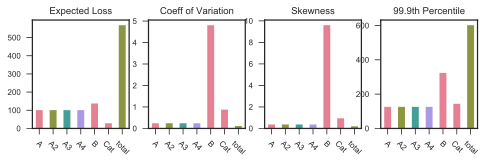

In [97]:
ans.plot('quick')

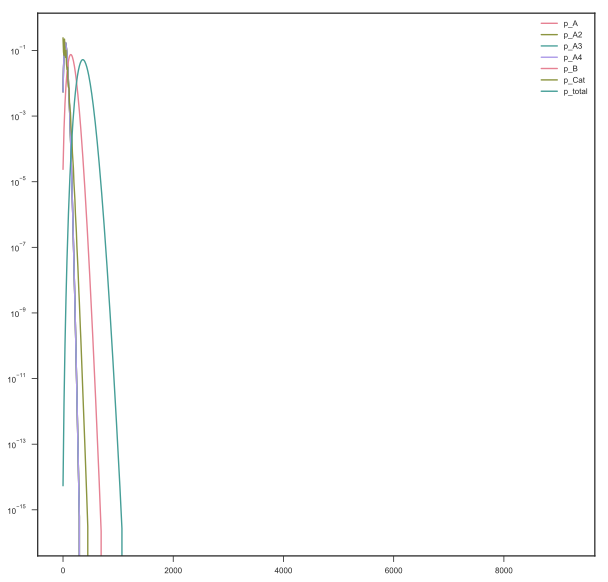

In [100]:
ans.plot('density', figsize=(10,10), logy=True)

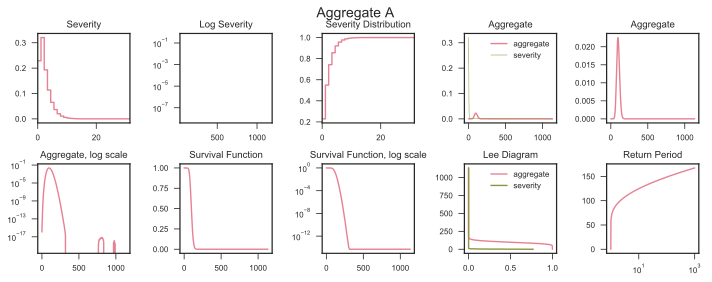

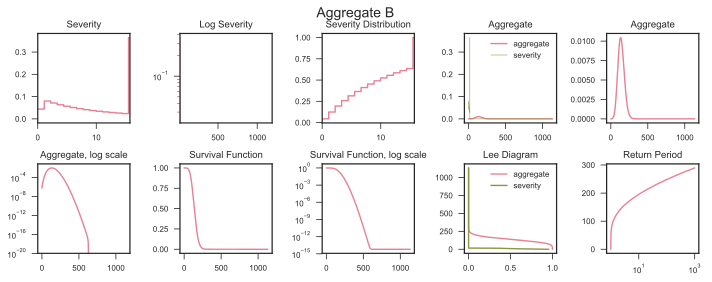

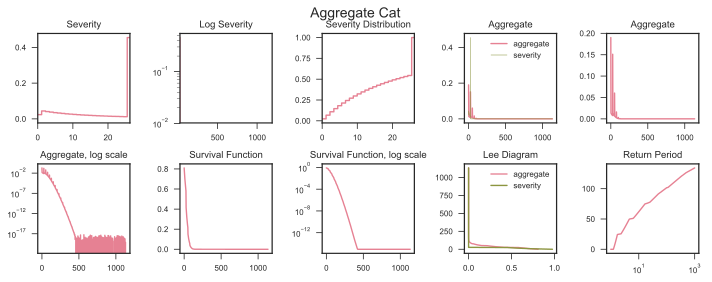

In [74]:
for a in ans:
    a.plot()

In [70]:
ans.report('all')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,100.604,99.4254,-0.0117194,0.239837,0.198326,-0.17308,149.575
B,137.407,140.116,0.0197085,0.854969,0.303062,-0.645529,249.292
Cat,28.2652,28.6338,0.0130395,0.876978,0.878898,0.00218902,101.933
total,266.277,268.175,0.00712655,0.195714,0.198206,0.0127294,402.191


,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
A,100.604,0.239837,0.367141,30,188.623,1,99.4254,0.198326,0.278576,99.4254,10274.2,1.10097e+06,125.2,132.956,149.575,157.331,168.41,183.922,212.729,-0.0117194,-0.17308,-0.241228
B,137.407,0.854969,1.60481,15,803.555,1,140.116,0.303062,0.332941,140.116,21435.5,3.53425e+06,196.11,213.837,249.292,265.911,290.286,325.741,388.895,0.0197085,-0.645529,-0.792535
Cat,28.2652,0.876978,0.943368,25,142.377,1,28.6338,0.878898,0.946303,28.6338,1453.23,92963.7,62.046,76.4495,101.933,116.336,135.172,165.087,218.269,0.0130395,0.00218902,0.00311151
total,266.277,0.195714,0.282706,30,449.417,1,268.175,0.198206,0.284409,268.175,74743,2.16023e+07,337.929,360.088,402.191,423.242,453.157,496.368,572.817,0.00712655,0.0127294,0.00602447


,A,B,Cat,not A,not B,not Cat,total,A,B,Cat,not A,not B,not Cat,A,B,Cat
,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2
0.001,147.716,253.578,124.963,300.26,217.464,353.28,398.441,391.374,400.029,409.136,401.827,396.556,396.794,420.064,412.79,444.676
0.002,141.711,240.823,115.898,285.317,206.485,339.173,382.273,375.311,383.914,392.951,385.669,380.352,380.671,405.082,397.442,430.616
0.003,138.037,233.023,110.045,276.179,199.813,330.499,372.343,365.444,374.01,383.001,375.743,370.394,370.763,395.952,388.069,422.08
0.004,135.325,227.316,105.708,269.495,194.946,324.124,365.054,358.202,366.731,375.688,368.456,363.083,363.485,389.29,381.215,415.877
0.005,133.172,222.781,102.263,264.187,191.101,319.034,359.24,352.427,360.937,369.862,362.643,357.256,357.688,384.008,375.776,410.962
0.006,131.375,219.006,99.9066,259.76,187.898,314.781,354.379,347.604,356.091,364.99,357.781,352.38,352.842,379.612,371.242,406.884
0.007,129.816,215.753,97.8657,255.946,185.144,311.113,350.185,343.44,351.909,360.785,353.59,348.18,348.66,375.834,367.348,403.382
0.008,128.442,212.89,96.0151,252.596,182.728,307.874,346.491,339.775,348.221,357.076,349.895,344.473,344.974,372.516,363.92,400.315
0.009,127.218,210.331,94.3197,249.602,180.57,304.972,343.177,336.486,344.916,353.75,346.58,341.152,341.668,369.554,360.854,397.574
